In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the data set
claimants = pd.read_csv("C:\\Users\shiny johncy\Downloads\claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)
#if we want remove the row nmae the row in drop and give axis is 0

In [4]:
#Shape of the data set
claimants.shape
claimants.head()
claimants.info()
claimants.isna().sum()

#WE FILL THE mean VALUES instead of null values
mean=claimants.CLMAGE.mean()
claimants.CLMAGE=claimants.CLMAGE.fillna(mean)#imputation



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [5]:
claimants.CLMSEX.value_counts()
claimants.CLMSEX=claimants.CLMSEX.fillna(1)#mode imputation
claimants.isna().sum()
#CLMINSIur and SEATBEAT are catorigal data..so that also we go with the mode only

ATTORNEY     0
CLMSEX       0
CLMINSUR    41
SEATBELT    48
CLMAGE       0
LOSS         0
dtype: int64

In [6]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1278, 6)

In [7]:
# Dividing our data into input and output variables 
# for the logistic we should the x and y data...for x we take reaminaing data from 1 couumn
# we have to imput the data for the attorney only...so we take the firt column only ie 0
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
train_X,train_X=train_test_split(X,test_size=0.3)
test_Y,test_Y=train_test_split(Y,test_size=0.3)

In [9]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [10]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred#it gives the probablity value

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [11]:
pd.DataFrame(y_pred)

,0
0,0
1,1
2,1
3,1
4,1
...,...
1273,1
1274,0
1275,1
1276,0


In [12]:
y_prob=classifier.predict_proba(X)
pd.DataFrame(y_prob)

,0,1
0,0.999966,0.000034
1,0.498596,0.501404
2,0.423132,0.576868
3,0.496398,0.503602
4,0.365195,0.634805
...,...,...
1273,0.407513,0.592487
1274,0.541148,0.458852
1275,0.283798,0.716202
1276,0.684198,0.315802


In [13]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [14]:
y_pred_df


,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
1335,1,1
1336,0,0
1337,1,1
1338,0,0


In [15]:
y_pred_df.actual.value_counts()

0    651
1    627
Name: actual, dtype: int64

In [16]:
pd.crosstab(y_pred_df.actual,y_pred_df.predicted_prob)


predicted_prob,0,1
actual,,
0,417,234
1,142,485


In [17]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
print (confusion_matrix)

<function confusion_matrix at 0x000002AC8EBE53A0>


In [18]:
((417+485)/(417+234+142+485))*100

70.5790297339593

In [19]:
((234+142)/(417+234+142+485))*100
#tn=0 is true egative(0,0)fp is false postive(0,1),fn is false negative(1,0)tpis true postive(1,1)

29.42097026604069

In [20]:
tn=cm[0,0]
tp=cm[1,1]
fp=cm[0,1]
fn=cm[1,0]
sensitivity=tp/(tp+fn)
specificity=tn/(tn+fp)


In [62]:
import numpy as np
accuracy=np.sum([cm[0,0],cm[1,1]])/np.sum(cm)
print(accuracy)

0.7057902973395931


In [64]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))
#f1 score is more difference..we should adjust that

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       651
           1       0.67      0.77      0.72       627

    accuracy                           0.71      1278
   macro avg       0.71      0.71      0.70      1278
weighted avg       0.71      0.71      0.70      1278



In [60]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

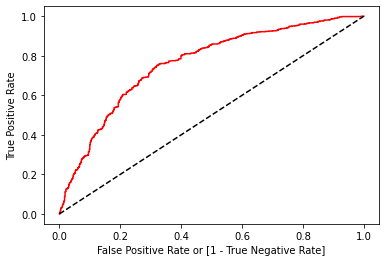

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
#the curve is always above
#the black line.the model is below 0.05 is bad
#anything above 0.05 is good model


In [ ]:
auc

FileNotFoundError: [Errno 2] File C:\Users\shiny johncy\Downloadsankfull.csv does not exist: 'C:\\Users\\shiny johncy\\Downloads\x08ankfull.csv'